In [ ]:
#import streamlit as st
#import plotly_express as px
import pandas as pd
#from plotnine import *
#from plotly.tools import mpl_to_plotly as ggplotly
import numpy as np


gs_URL = "https://docs.google.com/spreadsheets/d/1Fx7f6rM5Ce331F9ipsEMn-xRjUKYiR3R_v9IDBusUUY/edit#gid=0"
googleSheetId = gs_URL.split("spreadsheets/d/")[1].split("/edit")[0]
worksheetName = "Sheet1"
URL = f'https://docs.google.com/spreadsheets/d/{googleSheetId}/gviz/tq?tqx=out:csv&sheet={worksheetName}'
df = pd.read_csv(URL)
df = df.dropna(axis=1, how="any") 

global numeric_columns
global non_numeric_columns

numeric_columns = list(df.select_dtypes(['float', 'int']).columns)
non_numeric_columns = list(df.select_dtypes(['object']).columns)
non_numeric_columns.append(None)
catt = non_numeric_columns[0]
all = df.describe().T
out = df.groupby(["Gender"]).describe()
print(all)
print(out)


In [ ]:
import pandas as pd
adf = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", usecols=range(1,17))

In [ ]:
newdf = df[(df.origin == "JFK") & (df.carrier == "B6")]

In [23]:
import pandas as pd
from plotnine import *
import numpy as np
from tabulate import tabulate
import math
from scipy.stats import *

gs_URL = "https://docs.google.com/spreadsheets/d/1Fx7f6rM5Ce331F9ipsEMn-xRjUKYiR3R_v9IDBusUUY/edit#gid=0"
googleSheetId = gs_URL.split("spreadsheets/d/")[1].split("/edit")[0]
worksheetName = "Sheet3"
URL = f'https://docs.google.com/spreadsheets/d/{googleSheetId}/gviz/tq?tqx=out:csv&sheet={worksheetName}'    
df = pd.read_csv(URL)
df = df.dropna(axis=1, how="any") 
x = df["X"]
p_x = df["Prob(X)"]
m =  sum(x*p_x)  
sd = math.sqrt(sum((x-m)**2*p_x))
print(sd)





2.9681644159311658


In [60]:
from scipy.stats import *
import numpy as np

peh = 2
pah = 5
paah = np.r_[0:pah+6]
cdf = poisson.cdf(paah,peh)
pmf = poisson.pmf(paah,peh)
paah = pd.DataFrame(paah)
cdf = pd.DataFrame(cdf)
pmf = pd.DataFrame(pmf)
pm,pv = poisson.stats(peh)
pdf = pd.concat([paah,pmf,cdf],axis=1)
pdf.columns = ["Hits","PDF","CDF"]

print(pm,pv)

2.0 2.0


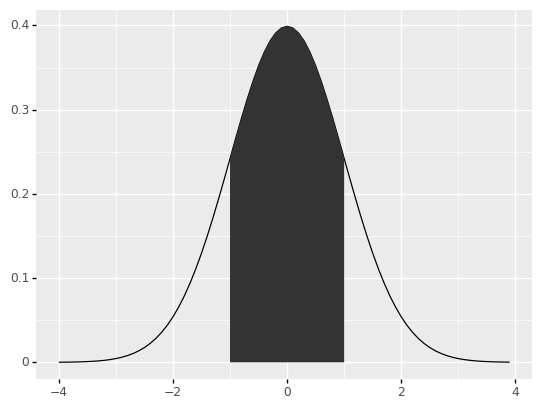

<ggplot: (130395359720)>

In [25]:
import math
from scipy.stats import *
import pandas as pd
import numpy as np
from plotnine import *

x = np.arange(-4,4,.1)
y = norm.pdf(x)
ndf = pd.DataFrame({"x":x,"y":y})


normp = ggplot(ndf) + geom_line(aes(x=x,y=y)) 
normp = normp + stat_function(fun = norm.pdf, geom = "area", xlim = (-1,1))
normp = normp + 
normp

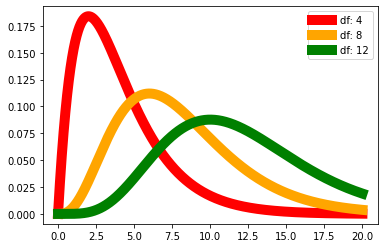

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), color = "red", label='df: 4', linewidth = 10)
plt.plot(x, chi2.pdf(x, df=8), color = "Orange", label='df: 8', linewidth =10) 
plt.plot(x, chi2.pdf(x, df=12), color = "green", label='df: 12', linewidth = 10) 

#add legend to plot
plt.legend()

In [1]:
from scipy.stats import *
import scipy.stats as sst

sst.t.pdf(2,2)
sst.t.ppt()

0.06804138174397717

In [13]:
import streamlit as st
import math
import scipy
import scipy.stats as sst
import pandas as pd
import numpy as np
from plotnine import *

df = 18
tp = 0
lt = -1
x = np.arange(-5,5,.1)
ny = sst.norm.pdf(x)
ty = sst.t.pdf(x,df)
tdf = pd.DataFrame({"x":x,"ny":ny,"ty":ty})
tdf["Left"] = np.where(tdf["x"]<=lt,tdf["ty"],0)
tplot = ggplot(tdf) + geom_line(aes(x=x,y=ny),linetype = "dashed") + geom_line(aes(x=x,y=ty)) + coord_fixed(ratio = 4) 
tp = tp + sst.t.cdf(lt,df)

tplot = tplot + geom_area(aes(x=x,y="Left")) 

tplot

PlotnineError: "stat_function requires parameter 'fun' to be a function or any other callable object"